In [8]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
from matplotlib import pyplot as plt

$$
    p_0(x) = 0.5 \cdot \phi(x \mid 0, 0.2^2) + 0.45 \cdot \phi(x \mid 0.75, 0.2^2) + 0.05 \cdot \phi(x \mid 3, 0.2^2)
$$

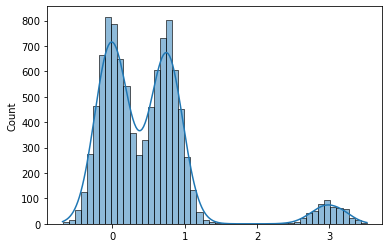

In [40]:
n = 10000
pp = 1

# generate data
# with prob 0.5 sample from N(0, 0.2^2)
# with prob 0.45 sample from N(0.75, 0.2^2)
# with prob 0.05 sample from N(3, 0.2^2)

X = np.zeros(n)

for i in range(n):
    u = np.random.uniform()
    if u < 0.5:
        X[i] = np.random.normal(0, 0.2)
    elif u < 0.95:
        X[i] = np.random.normal(0.75, 0.2)
    else:
        X[i] = np.random.normal(3, 0.2)

sns.histplot(X, bins=50, kde=True)

$$
\mathcal{L}(\rho, \mu_2) = \frac{1}{n} \sum_{i=1}^n \ln \left[ (1-\rho) \cdot \phi(x_i \mid 0, 0.2^2) + \rho \cdot \phi(x_i \mid \mu_2, 0.2^2) \right]
$$

In [41]:
norm.pdf(X, loc=0, scale=0.2)

array([1.98144297e+00, 4.21491677e-01, 1.31283655e-05, ...,
       2.13038702e-02, 1.30085375e+00, 9.46471351e-01])

In [42]:
def log_likelihood(x, rho, mu_2):
    n = len(x)
    
    pp = 1
    
    norm_1 = norm.pdf(x, loc=0,    scale=0.2**pp)
    norm_2 = norm.pdf(x, loc=mu_2, scale=0.2**pp)
    
    ll = 1 / n * np.sum(np.log( (1 - rho) * norm_1 + rho * norm_2 ))
    
    #ll = np.log( (1 - rho) * norm_1 + rho * norm_2 )
    
    return ll

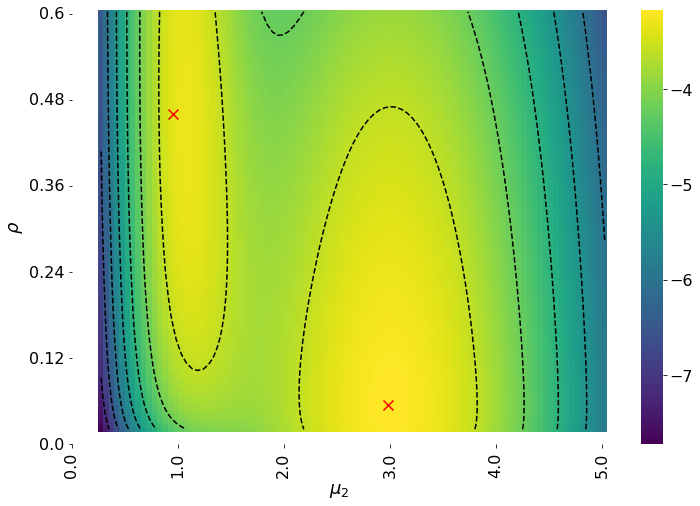

In [82]:
# grid from mu_2 = 0 to mu_2 = 5
# rho = 0.1, 0.2, ..., 0.6


fig, ax = plt.subplots(figsize=(12, 8))

mus = np.linspace(0.0, 5, 100)
rhos = np.linspace(0.0, 0.6, 100)

lls = np.zeros((len(rhos), len(mus)))

# mu on the x-axis, rho on the y-axis
for i, rho in enumerate(rhos):
    for j, mu in enumerate(mus):
        lls[i, j] = log_likelihood(X, rho, mu)


lls[:,0:5] = np.nan
lls[0:3,:] = np.nan
#sns.heatmap(lls, xticklabels=mus, yticklabels=rhos)

# find maximum in the first 20% of columns
# find maximum in the last 20% of columns
mle_first_20 = np.nanmax(lls[:,:np.shape(lls)[1]//5])
mle_last_80 = np.nanmax(lls[:,np.shape(lls)[1]//5:])


index_first_20 = np.where(lls == mle_first_20)
index_last_80 = np.where(lls == mle_last_80)

# plot the heatmap, use colormap 'viridis'
sns.heatmap(lls, xticklabels=mus, yticklabels=rhos, cmap='viridis', ax=ax)

# increase font size of colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# add the MLE to the plot,
plt.scatter(index_first_20[1], index_first_20[0], marker='x', color='red', s=100)
plt.scatter(index_last_80[1], index_last_80[0], marker='x', color='red', s=100)

# add contour lines
ax.contour(np.arange(.5, lls.shape[1]), np.arange(.5, lls.shape[0]), lls, colors='black')


# plot only 6 ticks on the x-axis and y-axis
# 0, 20, 40, 60, 80, 100
# 0, 20, 40, 60, 80, 100
plt.xticks(np.linspace(0, 99, 6), np.round(np.linspace(0, 5, 6), 2))
plt.yticks(np.linspace(0, 99, 6), np.round(np.linspace(0, 0.6, 6), 2))

# flip the y-axis
plt.gca().invert_yaxis()

# increase the font size of the x-axis and y-axis labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# increase the font size of the x label and y label
plt.xlabel(r'$\mu_2$', fontsize=18)
plt.ylabel(r'$\rho$', fontsize=18)

# save plot as eps file
plt.savefig('chen_reproduced.eps', format='eps', dpi=400)

plt.show()